#IMPORT LIBRARIES/DATASETS

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [0]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [0]:
x_train , y_train = train["features"] , train["labels"]

In [0]:
x_train.shape

(34799, 32, 32, 3)

In [0]:
y_train.shape

(34799,)

In [0]:
x_valid , y_valid = valid["features"] , valid["labels"]

In [0]:
x_valid.shape

(4410, 32, 32, 3)

In [0]:
x_test , y_test = test["features"] , test["labels"]

In [0]:
x_test.shape

(12630, 32, 32, 3)

#PERFORM IMAGES VISUALIZATION

2

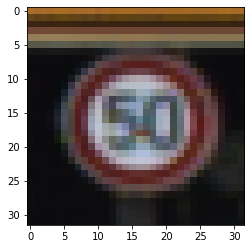

In [0]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

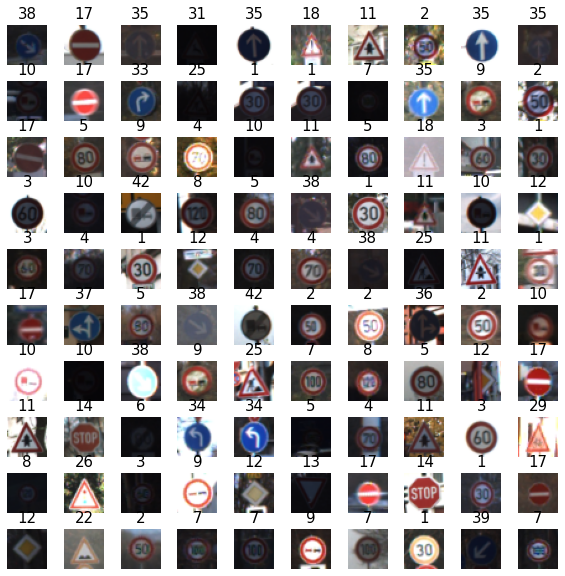

In [0]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0 , W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0 , n_training)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index] , fontsize = 15)
    axes[i].axis("off")
plt.subplots_adjust(hspace = 0.4)

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [0]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [0]:
x_train_gray = np.sum(x_train / 3 , axis = 3 , keepdims = True)

In [0]:
x_train_gray_norm = (x_train_gray - 128) / 128

In [0]:
x_train_gray_norm

array([[[[ 0.92708333],
         [ 0.92447917],
         [ 0.9140625 ],
         ...,
         [ 0.484375  ],
         [ 0.45833333],
         [ 0.3515625 ]],

        [[ 0.88020833],
         [ 0.87760417],
         [ 0.88541667],
         ...,
         [-0.31770833],
         [-0.359375  ],
         [-0.43489583]],

        [[ 0.89322917],
         [ 0.88802083],
         [ 0.890625  ],
         ...,
         [-0.52083333],
         [-0.52864583],
         [-0.55208333]],

        ...,

        [[ 0.80208333],
         [ 0.80989583],
         [ 0.81510417],
         ...,
         [-0.07552083],
         [-0.0625    ],
         [-0.00260417]],

        [[ 0.83854167],
         [ 0.8203125 ],
         [ 0.8046875 ],
         ...,
         [-0.14322917],
         [-0.09375   ],
         [-0.07552083]],

        [[ 0.67447917],
         [ 0.63802083],
         [ 0.61458333],
         ...,
         [-0.58333333],
         [-0.5859375 ],
         [-0.61458333]]],


       [[[ 0.90104167],


In [0]:
x_test_gray = np.sum(x_test / 3 , axis = 3 , keepdims = True)
x_valid_gray = np.sum(x_valid / 3 , axis = 3 , keepdims = True)

In [0]:
x_test_gray_norm = (x_test_gray - 128) / 128
x_valid_gray_norm = (x_valid_gray - 128) / 128

In [0]:
x_test_gray_norm

array([[[[ 0.1171875 ],
         [ 0.10416667],
         [ 0.11458333],
         ...,
         [-0.07552083],
         [-0.04947917],
         [-0.16666667]],

        [[ 0.12760417],
         [ 0.1171875 ],
         [ 0.12760417],
         ...,
         [ 0.140625  ],
         [ 0.13020833],
         [ 0.11979167]],

        [[ 0.125     ],
         [ 0.13020833],
         [ 0.109375  ],
         ...,
         [ 0.15364583],
         [ 0.15885417],
         [ 0.14583333]],

        ...,

        [[ 0.09635417],
         [ 0.07552083],
         [ 0.08333333],
         ...,
         [ 0.09635417],
         [ 0.09375   ],
         [ 0.1171875 ]],

        [[ 0.08854167],
         [ 0.08333333],
         [ 0.06770833],
         ...,
         [ 0.08072917],
         [ 0.08854167],
         [ 0.09635417]],

        [[ 0.078125  ],
         [ 0.06510417],
         [ 0.09114583],
         ...,
         [ 0.09375   ],
         [ 0.09895833],
         [ 0.10416667]]],


       [[[-0.50520833],


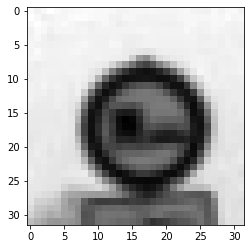

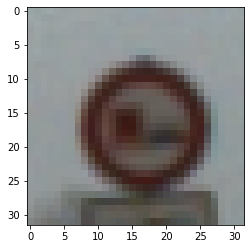

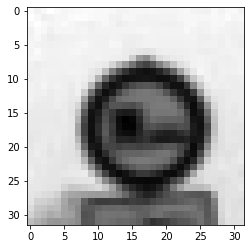

In [0]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

#BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [0]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6 , (5 , 5) , activation = "relu" , input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16 , (5 , 5) , activation = "relu"))
CNN.add(layers.AveragePooling2D())


CNN.add(layers.Flatten())

CNN.add(layers.Dense(120 , activation = "relu"))
CNN.add(layers.Dense(84 , activation = "relu"))
CNN.add(layers.Dense(43 , activation = "softmax"))
CNN.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)              

#COMPILE AND TRAIN DEEP CNN MODEL

In [0]:
CNN.compile(optimizer = "Adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])


In [0]:
history = CNN.fit(x_train_gray_norm,
                  y_train,batch_size = 500,
                 epochs = 5,
                 verbose = 1,
                 validation_data = (x_valid_gray_norm , y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 29s 830us/sample - loss: 3.2364 - accuracy: 0.1551 - val_loss: 2.8163 - val_accuracy: 0.2542
Epoch 2/5
34799/34799 [==============================] - 27s 763us/sample - loss: 1.9543 - accuracy: 0.4552 - val_loss: 1.5646 - val_accuracy: 0.5728
Epoch 3/5
34799/34799 [==============================] - 27s 778us/sample - loss: 1.2182 - accuracy: 0.6430 - val_loss: 1.0881 - val_accuracy: 0.6728
Epoch 4/5
34799/34799 [==============================] - 26s 748us/sample - loss: 0.8923 - accuracy: 0.7388 - val_loss: 0.8743 - val_accuracy: 0.7336
Epoch 5/5
34799/34799 [==============================] - 27s 763us/sample - loss: 0.7203 - accuracy: 0.7915 - val_loss: 0.7313 - val_accuracy: 0.7764


# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

In [0]:
score = CNN.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 6s 478us/sample - loss: 0.9589 - accuracy: 0.7671
Test Accuracy: 0.7670625448226929


In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

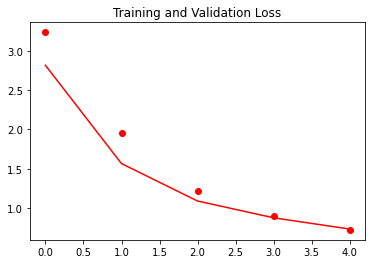

In [0]:
epochs = range(len(accuracy))
plt.plot(epochs , loss , "ro" , label = "Training Loss")
plt.plot(epochs , val_loss , "r" , label = "Validation Loss")
plt.title("Training and Validation Loss")

Text(0.5, 1.0, 'Training and Validation accuracy')

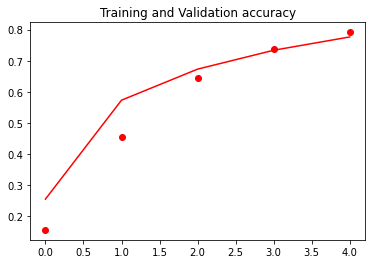

In [0]:
epochs = range(len(accuracy))
plt.plot(epochs , accuracy , "ro" , label = "Training accuracy")
plt.plot(epochs , val_accuracy , "r" , label = "Validation accuracy")
plt.title("Training and Validation accuracy")

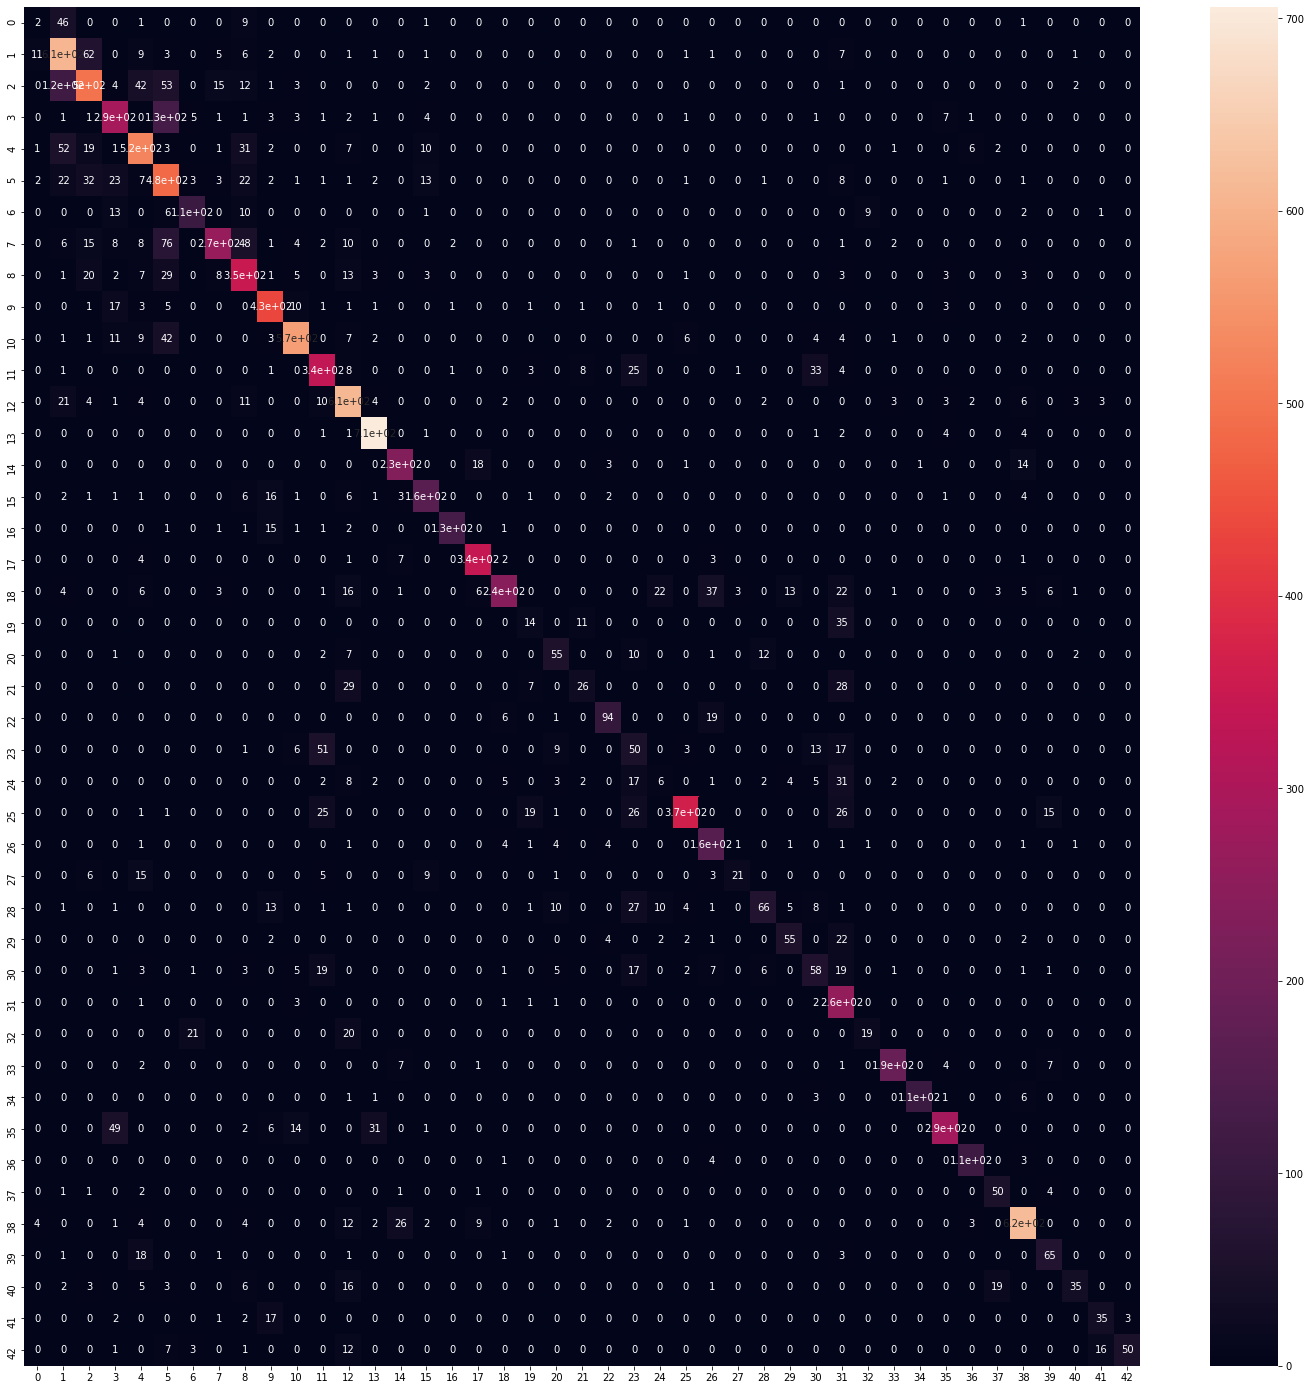

In [0]:
predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

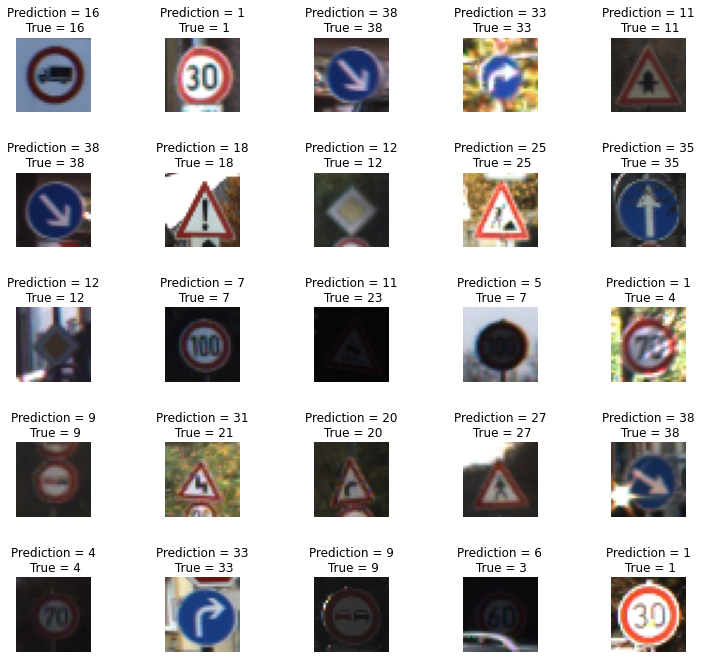

In [0]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    